# UEFA CHAMPIONS LEAGUE PROJECT

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from sklearn import manifold
warnings.filterwarnings('ignore')

In [3]:
df_key_stats = pd.read_csv('key_stats.csv')
df_defending = pd.read_csv('defending.csv')
df_attacking = pd.read_csv('attacking.csv')
df_disciplinary = pd.read_csv('disciplinary.csv')
df_distribution = pd.read_csv('distribution.csv')
df_goals = pd.read_csv('goals.csv')
df_attempts = pd.read_csv('attempts.csv')
df_goalkeeping = pd.read_csv('goalkeeping.csv')


In [4]:
df_key_stats.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [5]:
df_key_stats.isnull().sum().any

<bound method NDFrame._add_numeric_operations.<locals>.any of player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
dtype: int64>

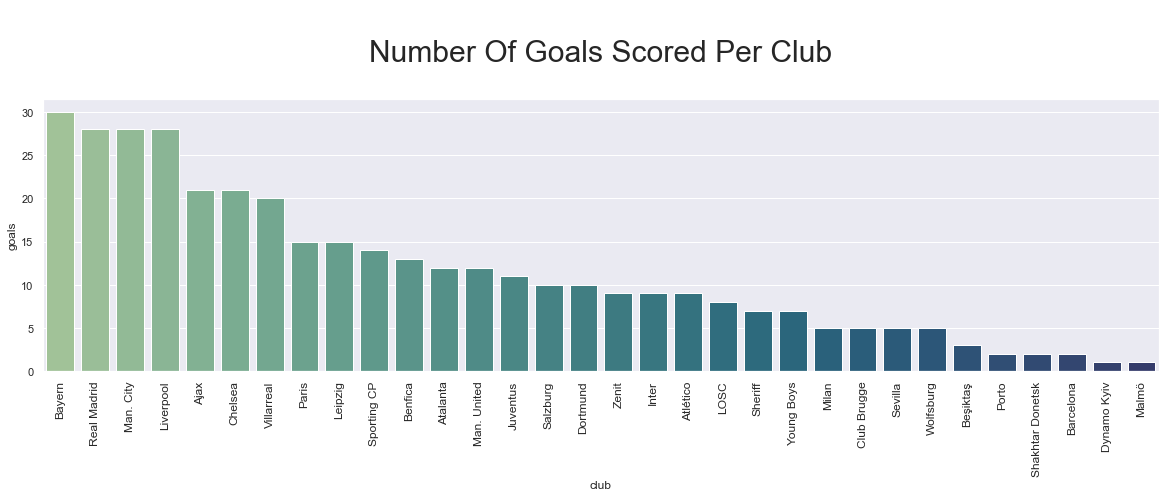

In [6]:
TGSPC=df_key_stats.groupby('club',as_index = False)["goals"].sum().sort_values(by='goals',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="goals", data=TGSPC,palette="crest",capsize=.2)
p.axes.set_title("\nNumber Of Goals Scored Per Club\n",fontsize=30);

# Average Playing Time Per Player Per Club

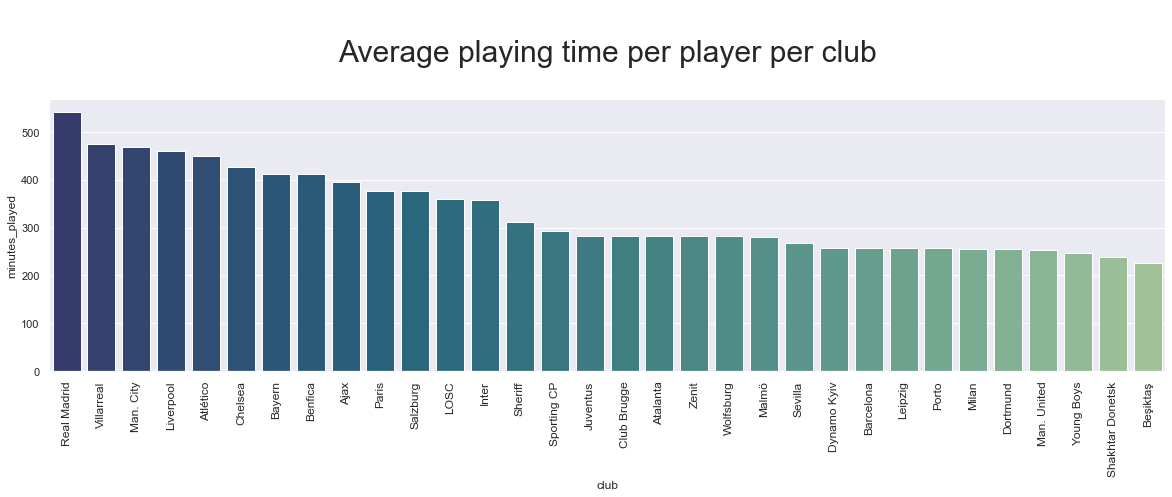

In [7]:
APT=df_key_stats.groupby('club',as_index = False)["minutes_played"].mean().sort_values(by='minutes_played',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="minutes_played", data=APT,palette="crest_r",capsize=.2)
p.axes.set_title("\nAverage playing time per player per club\n",fontsize=30);

# Top 10 Scorers

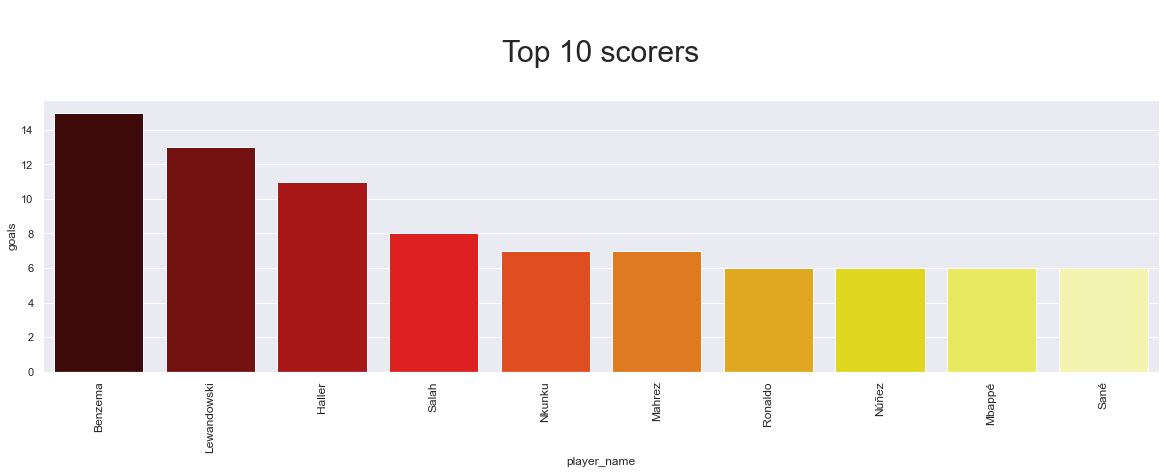

In [8]:
T=df_key_stats.sort_values(by='goals',ascending=False)
TS=T[:10]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="player_name", y="goals", data=TS,palette="hot",capsize=2)
p.axes.set_title("\nTop 10 scorers\n",fontsize=30);

# Top 15 Goal Scoring Teams

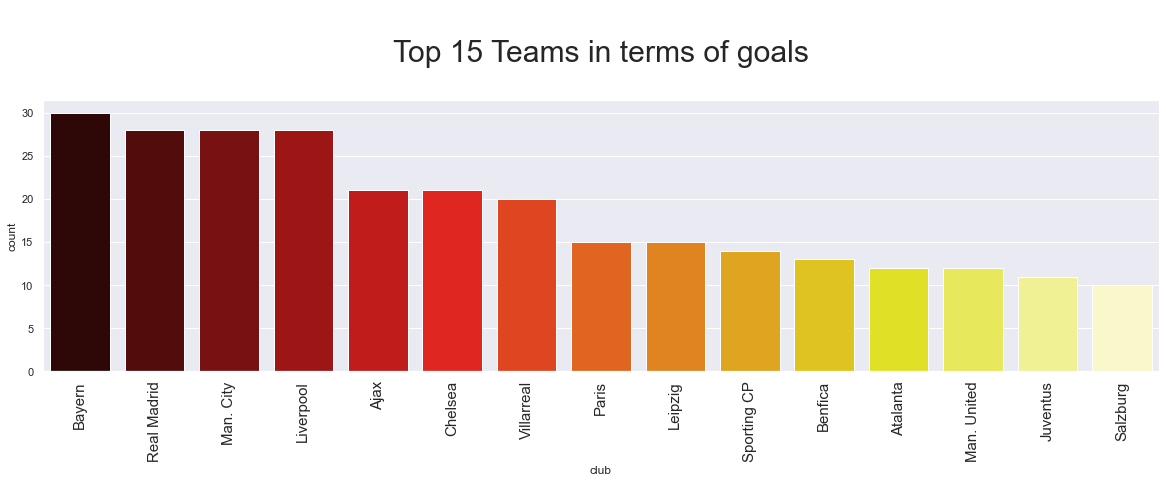

In [9]:
GST=df_key_stats.groupby('club')['goals'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
GST=GST[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=GST,palette="hot",capsize=2)
p.axes.set_title("\nTop 15 Teams in terms of goals\n",fontsize=30);

# Goal types analysis(How Scored)

In [10]:
GTA = pd.DataFrame(df_goals.sum(numeric_only = True),).T[["right_foot","left_foot","headers","others"]]
GTA=GTA.T
fig = px.pie(GTA, values=0, names=GTA.index, title=' Goal types analysis (How scored)', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Goal Types Analysis (From Where Scored)

In [27]:
GTA = pd.DataFrame(df_goals.sum(numeric_only = True),).T[["inside_area","outside_areas","penalties"]]
GTA=GTA.T
fig = px.pie(GTA, values=0, names=GTA.index, title='Goal Types Analysis (From where scored)')
fig.show()

Goal Types Analysis (Player's Position)

Text(0.5, 1.0, "\nGoals Per Player's Position\n")

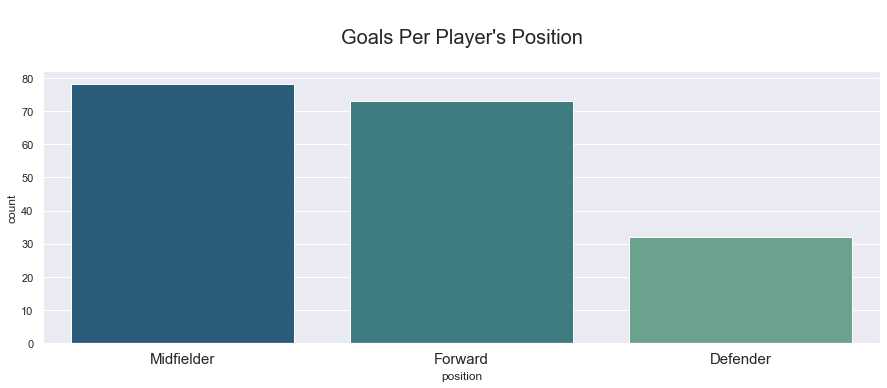

In [20]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df_goals['position'],hue_order=df_goals.groupby('position'),order=df_goals.position.value_counts().sort_values(ascending=False).index,palette="crest_r")
p.axes.set_title("\nGoals Per Player's Position\n",fontsize=20)

# Top 15 dribblers

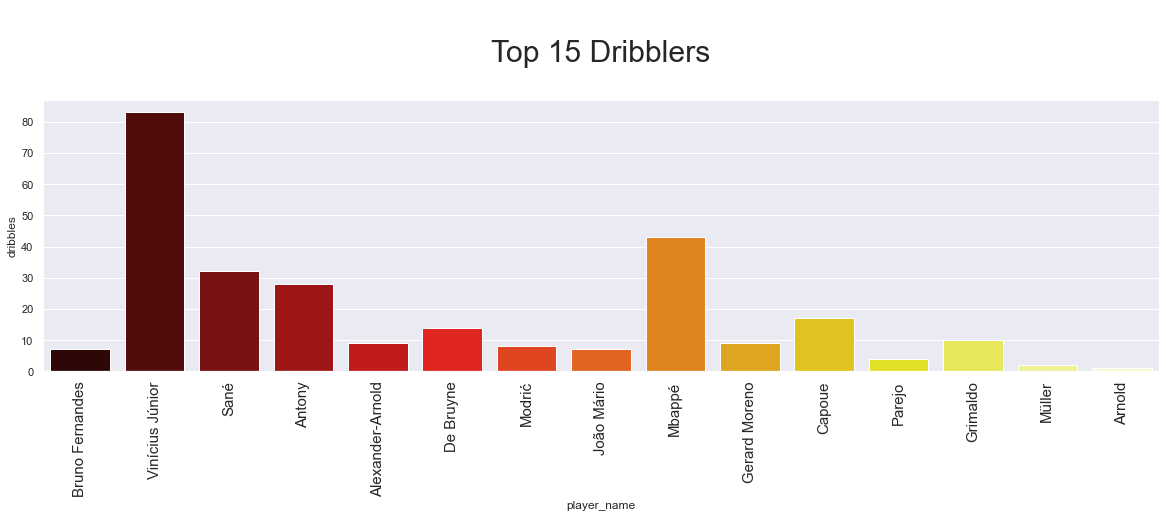

In [24]:
Dribblers=df_attacking.sort_values(by='dribbles',ascending=False)
Dribblers=df_attacking[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="dribbles", data=Dribblers,palette="hot",capsize=2)
p.axes.set_title("\nTop 15 Dribblers\n",fontsize=30);

# Top 15 Corner Takers

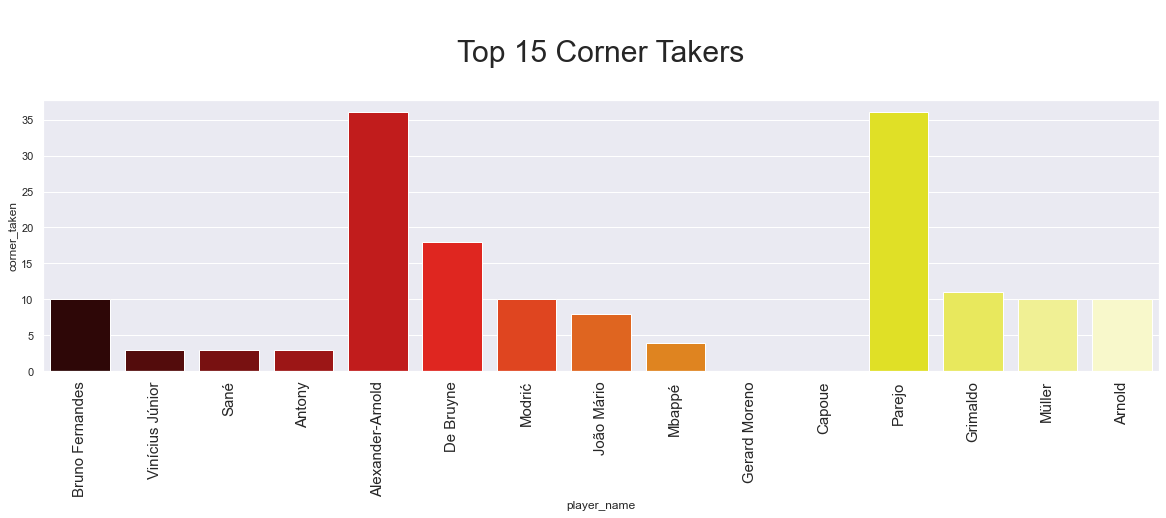

In [25]:
Corner_Takers=df_attacking.sort_values(by='corner_taken',ascending=False)
Corner_Takers=df_attacking[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="corner_taken", data=Corner_Takers,palette="hot",capsize=2)
p.axes.set_title("\nTop 15 Corner Takers\n",fontsize=30);